In [165]:
import json
from datetime import datetime
import plotly.express as px
from sklearn.model_selection import train_test_split
import sqlite3
import nltk
import spacy
import geopandas as gpd
from shapely.geometry import Polygon
import numpy as np
import umap
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,log_loss, precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
import itertools
%matplotlib inline

In [104]:
df_food = pd.read_csv('/Users/robholmstrom/OneDrive/Gitrepos/nonrepo_files/capstone4_files/df_food_clean_rev.csv')

In [105]:
df_food['stars'].replace(3,np.nan, inplace =True)
df_food.dropna(inplace=True)
df_food['star_binary'] = np.where(df_food['stars'] <3, 'no', 'yes')


In [106]:
df_food['state_star'] = df_food['state'] + df_food['star_binary']


In [107]:
df_food_v2 = df_food.reset_index(drop=True).drop('Unnamed: 0', axis = 1)

In [108]:
df_food_clean = df_food_v2.copy()

In [110]:
vectorizer = CountVectorizer(analyzer='word', min_df=200, max_features=25)
Xvec = vectorizer.fit_transform(df_food_clean['food_comb'])
bow_df = pd.DataFrame(Xvec.toarray(), columns=vectorizer.get_feature_names())

In [111]:
vectorizertf = TfidfVectorizer(analyzer='word', min_df=50, max_features=50)
Xvectf = vectorizertf.fit_transform(df_food_clean['food_comb'])
tf_df = pd.DataFrame(Xvectf.toarray(), columns=vectorizertf.get_feature_names())

In [113]:
df_vec = bow_df

In [114]:
df_vec = tf_df

In [116]:
X = df_vec
y = df_food_clean['state_star']

In [118]:
k = 25
if len(X.columns) >= k:
    skb = SelectKBest(k = k, score_func = f_classif)
    best_kfit = skb.fit(X, y)
    X_best_feat = best_kfit.fit_transform(X,y)

    X_best_feat = pd.DataFrame(X_best_feat, columns=X.columns[best_kfit.get_support()])

    best_features = X_best_feat.columns.tolist()
else:
    print('To few columns to select')

In [119]:
best_features

['american',
 'asianfusion',
 'breakfast',
 'brunch',
 'buffets',
 'burgers',
 'cafes',
 'chickenwings',
 'chinese',
 'fastfood',
 'french',
 'indian',
 'japanese',
 'korean',
 'mexican',
 'new',
 'noodles',
 'pizza',
 'restaurant',
 'salad',
 'sandwiches',
 'southern',
 'steakhouses',
 'tacos',
 'traditional']

In [120]:
# X = df_vec[best_features]
# y = df_food_clean['state']

In [121]:
X

,american,asianfusion,bakeries,barbeque,breakfast,brunch,buffets,burgers,cafes,chickenwings,...,steakhouses,sushibars,tacos,tapas,tea,thai,traditional,vegan,vegetarian,vietnamese
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.65025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.65025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.65025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.65025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.65025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2297212,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2297213,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2297214,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2297215,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:

# df_umap = X[(X != 0).any(axis=1)]
# df_umap = X.loc[:, (X != 0).any(axis=0)]
# df_umap

In [161]:
# up = umap.UMAP(n_neighbors = 20, min_dist = .8, metric = 'euclidean')
# Xumap = up.fit_transform(X)
# sns.scatterplot(Xumap[:, 0], Xumap[:, 1], hue = df_food_clean['star_binary'], s= 10)

In [124]:
le_train = LabelEncoder()
y_le = le_train.fit_transform(y)

In [162]:
y_export = pd.Series(y_le)
X.to_csv('/Users/robholmstrom/OneDrive/Gitrepos/nonrepo_files/capstone4_files/C4_rev_ds_X.csv')
y.to_csv('/Users/robholmstrom/OneDrive/Gitrepos/nonrepo_files/capstone4_files/C4_rev_ds_y.csv')

In [127]:
y.value_counts()

NVyes    637171
AZyes    535616
ONyes    206314
NVno     192217
AZno     176801
NCyes    130179
OHyes     94003
PAyes     90127
ONno      63957
QCyes     57923
NCno      44157
OHno      31621
PAno      26412
QCno      10719
Name: state_star, dtype: int64

In [128]:
y_state_dict= pd.concat([pd.DataFrame(y_le), pd.DataFrame(y)], axis = 1).groupby('state_star')[0].mean()

In [186]:
y_state_dict_swap = {value:key for key, value in y_state_dict.items()}


In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y_le, stratify = y_le, random_state = 42)

In [133]:
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)
X_test_rus, y_test_rus = rus.fit_sample(X_test, y_test)


In [136]:

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_rus)
X_test_scaled = scaler.transform(X_test_rus)

In [137]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class= 'ovr', solver = 'lbfgs', penalty = 'l2', max_iter = 1000)

In [138]:
lr.fit(X_train_scaled, y_train_rus)

LogisticRegression(max_iter=1000, multi_class='ovr')

In [139]:
y_test_pred = lr.predict(X_test_scaled)
y_train_pred = lr.predict(X_train_scaled)

In [142]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=None):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    
   

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')
        
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black", fontsize=10)
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black",fontsize=10)


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [141]:

print('LR1 confusion matrix')
#lr1train = confusion_matrix(y_train, y_pred_train, normalize= None)
lr1test = confusion_matrix(y_test_rus, y_test_pred, normalize = None)
test = pd.DataFrame(lr1test).rename(columns = y_state_dict_swap, index = y_state_dict_swap)

LR1 confusion matrix


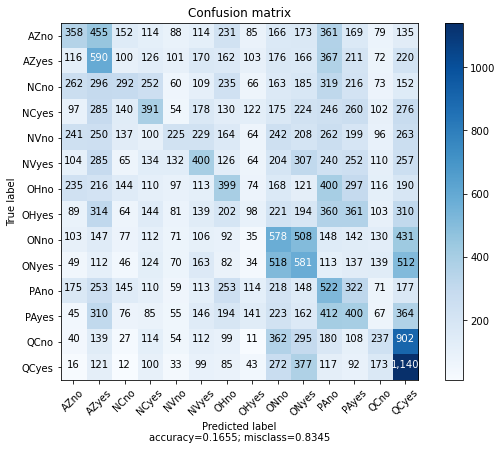

In [143]:
labels = list(y_state_dict_swap.values())
target_names = labels 
plot_confusion_matrix(lr1test,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=None)

In [144]:
print('Test macro average recall score is ',recall_score(y_test_rus, y_test_pred, average = 'macro'))
print('Train macro average recall score is ',recall_score(y_train_rus, y_train_pred, average = 'macro'))

Test macro average recall score is  0.16553837953091685
Train macro average recall score is  0.1679046789757077


In [145]:
print('Test accuracy score is ',accuracy_score(y_test_rus, y_test_pred))
print('Train accuracy score is ',accuracy_score(y_train_rus, y_train_pred))

Test accuracy score is  0.16553837953091685
Train accuracy score is  0.1679046789757077


In [146]:
recall_score(y_test_rus, y_test_pred, average = 'macro')/(1/lr1test.shape[0])

2.317537313432836

In [159]:
# knn1 = KNeighborsClassifier(n_neighbors=15, weights='uniform', leaf_size=20)
# knn1.fit(X_train_scaled, y_train_rus)

# y_test_predknn1 = knn1.predict(X_test_scaled)
# y_train_predknn1 = knn1.predict(X_train_scaled)


In [156]:
# knntest = confusion_matrix(y_test_rus, y_test_pred, normalize = None)
# dfknn = pd.DataFrame(knntest).rename(columns = y_state_dict_swap)

In [157]:
print('Test macro average recall score is ',recall_score(y_test_rus, y_test_predknn1,average = 'macro'))
print('Train macro average recall score is ',recall_score(y_train_rus, y_train_predknn1,average = 'macro'))

Test macro average recall score is  0.20597014925373136
Train macro average recall score is  0.22645851474063944


In [176]:
recall_score(y_test_rus, y_test_predknn1, average = 'macro')/(1/knntest.shape[0])

2.883582089552239

In [158]:
print('Test accuracy score is ',accuracy_score(y_test_rus, y_test_predknn1))
print('Train accuracy score is ',accuracy_score(y_train_rus, y_train_predknn1))

Test accuracy score is  0.20597014925373133
Train accuracy score is  0.22645851474063938


In [179]:
rf = RandomForestClassifier(max_depth = 8)
rf.fit(X_train_scaled, y_train_rus)
y_test_predrf = rf.predict(X_test_scaled)
y_train_predrf = rf.predict(X_train_scaled)



In [155]:
rftest = confusion_matrix(y_test_rus, y_test_predrf, normalize = None)
dfrf = pd.DataFrame(rftest).rename(columns = y_state_dict_swap)

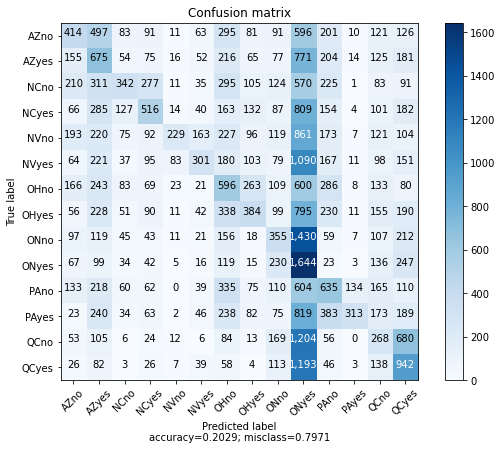

In [154]:
plot_confusion_matrix(rftest,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=None)

In [173]:
print('Test macro average recall score is ',recall_score(y_test_rus, y_test_predrf,average = 'macro'))
print('Train macro average recall score is ',recall_score(y_train_rus, y_train_predrf,average = 'macro'))

Test macro average recall score is  0.20293176972281451
Train macro average recall score is  0.2109626286140778


In [177]:
recall_score(y_test_rus, y_test_predrf, average = 'macro')/(1/rftest.shape[0])

2.8410447761194035

In [166]:
params = {'n_estimators': 1000,
          'max_depth': 2,
          'loss': 'deviance', 
          'learning_rate':0.08, 
          'subsample':.62, 
          'min_samples_split':.02}

# Initialize and fit the model.
gbc = GradientBoostingClassifier(**params)
gbc.fit(X_train_scaled, y_train_rus)

y_test_predgb = gbc.predict(X_test_scaled)
y_train_predgb = gbc.predict(X_train_scaled)

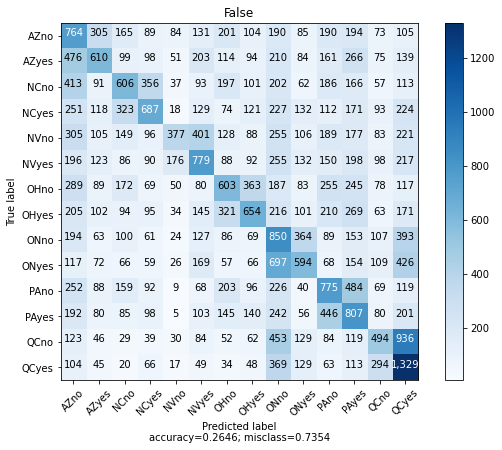

In [187]:
gbtest = confusion_matrix(y_test_rus, y_test_predgb)
plot_confusion_matrix(gbtest,target_names,False)

In [182]:
print('Test macro average recall score is ',recall_score(y_test_rus, y_test_predgb,average = 'macro'))
print('Train macro average recall score is ',recall_score(y_train_rus, y_train_predgb,average = 'macro'))

Test macro average recall score is  0.2646321961620469
Train macro average recall score is  0.2817603468803867


In [183]:
recall_score(y_test_rus, y_test_predgb, average = 'macro')/(1/gbtest.shape[0])

3.704850746268657

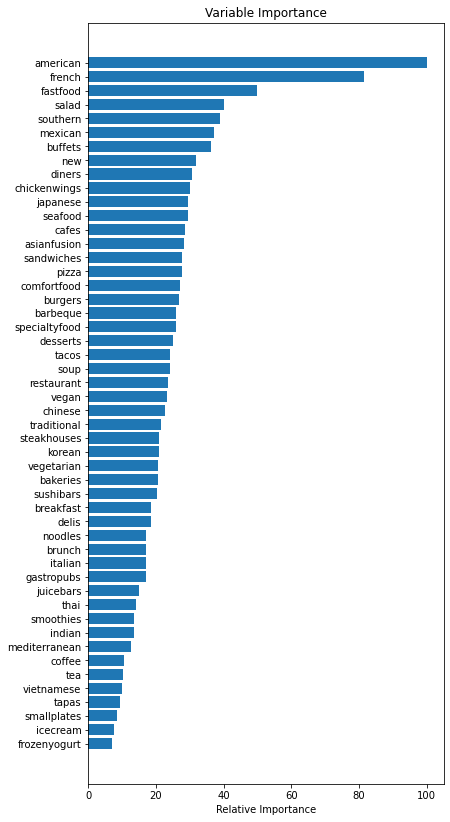

In [184]:
feature_importance = gbc.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(14,14))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [178]:
recall_score(y_test_rus, y_test_predgb, average = 'macro')/(1/cm.shape[0])

3.704850746268657

In [ ]:
%%capture out
#Show UMAP visualization of high variance gene ZIFA data
fig = plt.figure(figsize = (15,4))
fig.subplots_adjust(hspace=1, wspace=.6)
plt.subplot(131)
fig = sns.scatterplot(zumapHV[:,0], zumapHV[:,1], hue = df2.index)
fig.set_title('UMAP (5 dim): high variance genes \n cell type labeled')
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.subplot(132)
# fig = sns.scatterplot(zumapHV[:,0], zumapHV[:,1], hue = clusterHV, palette = ['r', 'b', 'g', 'y', 'c', 'm'])
# fig.set_title('UMAP (5 dim): high variance genes \n GMM cluster labeled')
# fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.subplot(133)
fig = sns.scatterplot(zumapHV[:,0], zumapHV[:,1], hue = kpredHV)
fig.set_title('UMAP (5 dim): high variance genes \n k-means labeled')
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()